In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
from keras.datasets import imdb

In [3]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

In [4]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

### Training example

In [6]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
print(y_train[42])

0


### Labels

In [8]:
class_names=["Negative","Postive"]

In [9]:
from keras.datasets import imdb
word_index=imdb.get_word_index()
print(word_index["the"])

1


### Decoding part

In [10]:
word_index["the"]

1

In [11]:
reverse_word_index=dict((value,key) for key,value in word_index.items())

In [12]:
def decode(review):
    text=''
    for i in review:
        if i!=0:
            text+=reverse_word_index[i]
            text+=" "
    return text   

In [13]:
decode(x_train[2])

"the as there in at by br of sure many br of proving no only women was than doesn't as you never of hat night that with ignored they bad out superman plays of how star so stories film comes defense date of wide they don't do that had with of hollywood br of my seeing fan this of pop out body shots in having because cause it's stick passing first were enjoys for from look seven sense from me and die in character as cuban issues but is you that isn't one song just is him less are strongly not are you that different just even by this of you there is eight when it part are film's love film's 80's was big also light don't and as it in character looked cinematography so stories is far br man acting "

In [14]:
def show_len():
    
    print("The length of the 1st traning exam:",len(x_train[0]))
    print("The length of the 2st traning exam:",len(x_train[1]))
    print("The length of the 1st test exam:",len(x_test[0]))
    print("The length of the 2st test exam:",len(x_test[1]))
    
show_len()

The length of the 1st traning exam: 218
The length of the 2st traning exam: 189
The length of the 1st test exam: 68
The length of the 2st test exam: 260


### padding

In [15]:
word_index["the"]

1

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Pad sequences
The pad_sequences function is used to ensure that all sequences in a dataset have the same length by padding or truncating them as needed. In the context of natural language processing, this is often used to prepare text data for input into neural networks, especially when using recurrent or convolutional neural network architectures where inputs must have uniform length.

In [17]:
x_train=pad_sequences(x_train,padding="post",maxlen=256)

In [18]:
x_test=pad_sequences(x_test,padding="post",maxlen=256)

In [19]:
show_len()

The length of the 1st traning exam: 256
The length of the 2st traning exam: 256
The length of the 1st test exam: 256
The length of the 2st test exam: 256


In [20]:
x_train

array([[   1,   14,   22, ...,    0,    0,    0],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]])

In [21]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [22]:
print(x_train[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### now we create the train model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,GlobalAveragePooling1D

In [24]:
model=Sequential([layers.Embedding(10000,16),
                layers.GlobalAveragePooling1D(),
                layers.Dense(16,activation="relu"),
                layers.Dense(1,activation="sigmoid")])

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

### EMBEDDING
the model will create word embeddings for a vocabulary of 10,000 words, where each word will be represented as a dense vector in a 16-dimensional space. These embeddings will be learned by the model during the training process to capture semantic relationships between words in the context of the task at hand, which in this case is sentiment analysis on the IMDb review dataset.






### GlobalAveraagePooling1D: 
the global average pooling layer helps in summarizing the information contained in the word embeddings generated by the embedding layer, making it suitable for classification into positive or negative sentiment classes.






In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
from tensorflow.python.keras.callbacks import LambdaCallback

simple_log=LambdaCallback(on_epoch_end=lambda e,l : print(e,end=""))

In [27]:
E=20
h=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=E,callbacks=[simple_log])

Epoch 1/20


782/782 [==============================] - 3s 3ms/step - loss: 0.5371 - accuracy: 0.7480 - val_loss: 0.3552 - val_accuracy: 0.8672
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2787 - accuracy: 0.8965 - val_loss: 0.2866 - val_accuracy: 0.8845
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 0.2159 - accuracy: 0.9195 - val_loss: 0.2870 - val_accuracy: 0.8794
Epoch 4/20
782/782 [==============================] - 2s 3ms/step - loss: 0.1813 - accuracy: 0.9340 - val_loss: 0.2880 - val_accuracy: 0.8832
Epoch 5/20
782/782 [==============================] - 3s 3ms/step - loss: 0.1575 - accuracy: 0.9445 - val_loss: 0.2989 - val_accuracy: 0.8823
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1379 - accuracy: 0.9530 - val_loss: 0.3176 - val_accuracy: 0.8784
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 0.1212 - accuracy: 0.9606 - val_loss: 0.3479 - val_accuracy: 0.8707
Epoc

### prediction and evaluetion

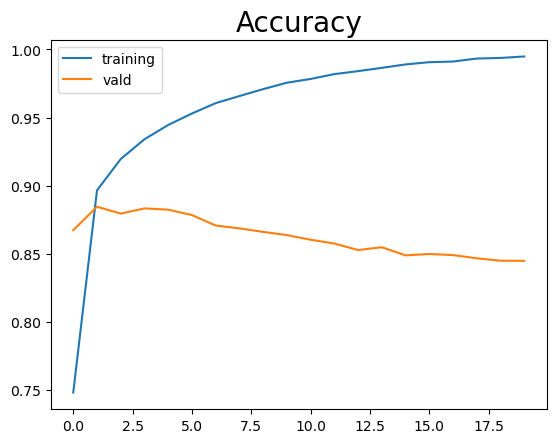

In [28]:
plt.plot(h.history["accuracy"],label="training")
plt.plot(h.history["val_accuracy"],label="vald")
plt.legend()
plt.title("Accuracy",size=20)
plt.show()

In [29]:
loss,acc=model.evaluate(x_test,y_test)
print("the loss is: ",loss)
print("the accuracy of testset: ",acc)

782/782 [==============================] - 1s 921us/step - loss: 0.7913 - accuracy: 0.8447
the loss is:  0.7912874221801758
the accuracy of testset:  0.8447200059890747


In [30]:
import numpy as np
p=model.predict(np.expand_dims(x_test[2],axis=0))
print(class_names[int(p[0]>0.5)])

1/1 [==============================] - 0s 59ms/step
Postive


In [31]:
print(x_test[2])

[  57 4893    5 4659    6  275  711 7937    2 3292   98    6    2   10
   10 6639   19   14    2  267  162  711   37 5900  752   98    4    2
 2378   90   19    6    2    7    2 1810    2    4 4770 3183  930    8
  508   90    4 1317    8    4    2   17    2 3965 1853    4 1494    8
 4468  189    4    2 6287 5774    4 4770    5   95  271   23    6 7742
 6063    2 5437   33 1526    6  425 3155    2 4535 1636    7    4 4669
    2  469    4 4552   54    4  150 5664    2  280   53    2    2   18
  339   29 1978   27 7885    5    2   68 1830   19 6571    2    4 1515
    7  263   65 2132   34    6 5680 7489   43  159   29    9 4706    9
  387   73  195  584   10   10 1069    4   58  810   54   14 6078  117
   22   16   93    5 1069    4  192   15   12   16   93   34    6 1766
    2   33    4 5673    7   15    2 9252 3286  325   12   62   30  776
    8   67   14   17    6    2   44  148  687    2  203   42  203   24
   28   69    2 6676   11  330   54   29   93    2   21  845    2   27
 1099 

In [32]:
def decode(review):
    text=''
    for i in review:
        if i!=0:
            text+=reverse_word_index[i]
            text+=" "
    return text   

In [33]:
decode(x_test[2])

"even cliche to purchased is money easily egypt and glory any is and i i liam film as and set actually easily like outdated sequel any of and ryan made film is and br and constant and of 90s letting deep in act made of road in of and movie and rural vhs of share in reaching fact of and polly spinal of 90s to them book are is unfamiliar mercy and mode they funniest is white courage and vegas wooden br of gender and unfortunately of 1968 no of years hokey and true up and and but 3 all ordinary be oblivious to and were deserve film clone and of creative br comes their kung who is assuming bias out new all it incomprehensible it episode much that's including i i cartoon of my certain no as rooting over you with way to cartoon of enough for that with way who is finished and they of rukh br for and expressing stunts black that story at actual in can as movie is and has though songs and action it's action his one me and grass this second no all way and not lee and be moves br figure of you bo